# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps
from scipy.integrate import solve_ivp

# Define Lorenz System

In [2]:
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Plotting Time Series

A time series plots the value of one coordinate throughout time. In this case, the "x" coordinate of the system has been arbitrarily chosen. The behvior of the time series can tell us a lot about the overall system's behavior when given different parameters. 

Regular and repeating patterns are shown when the system is displaying periodic behavior. This indicates that the system's state returns to similar values at regular intervals.

Irregular and non-repeating patterns are representative of chaotic behavior, indicating that the system's state evolves in an unpredictable and chaotic manner.

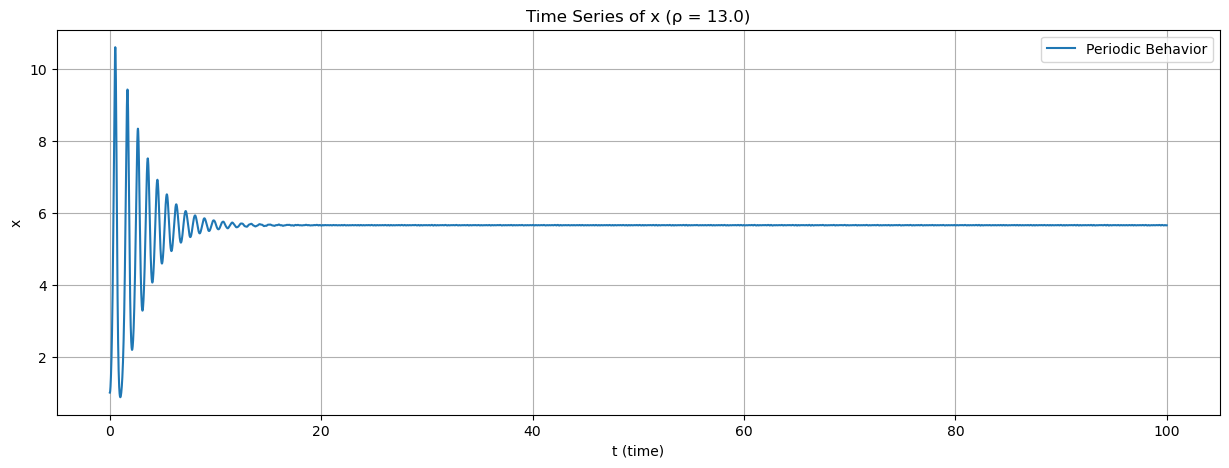

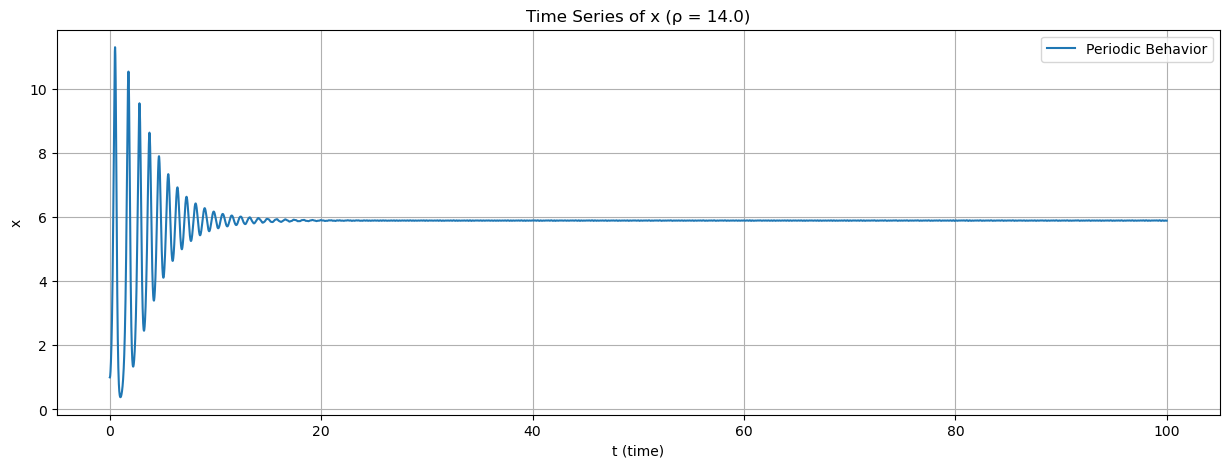

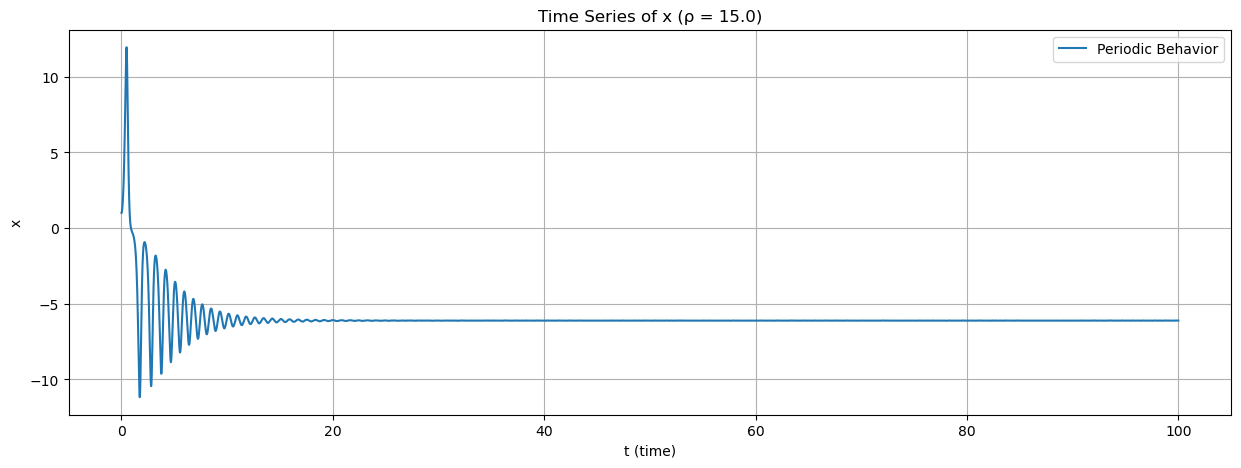

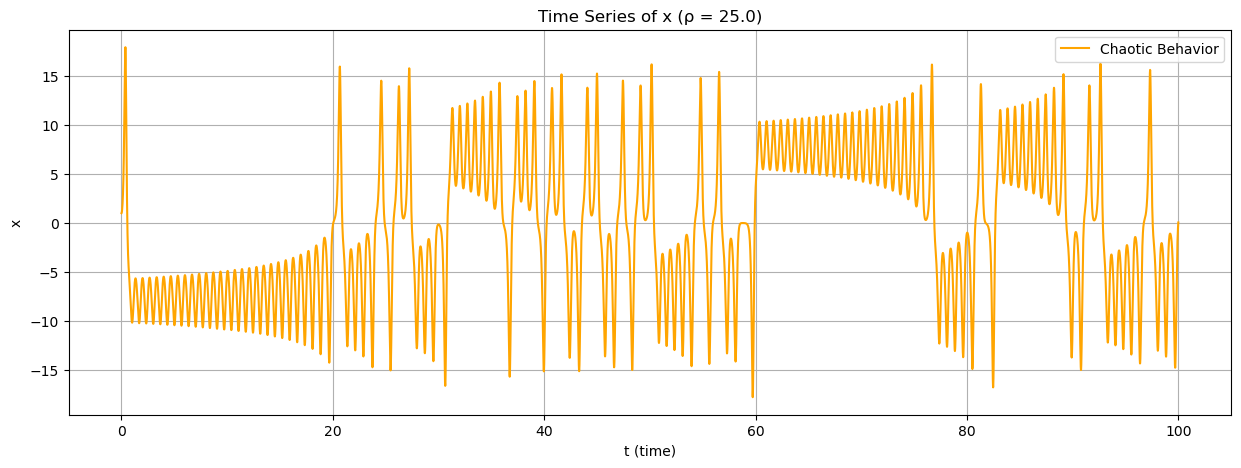

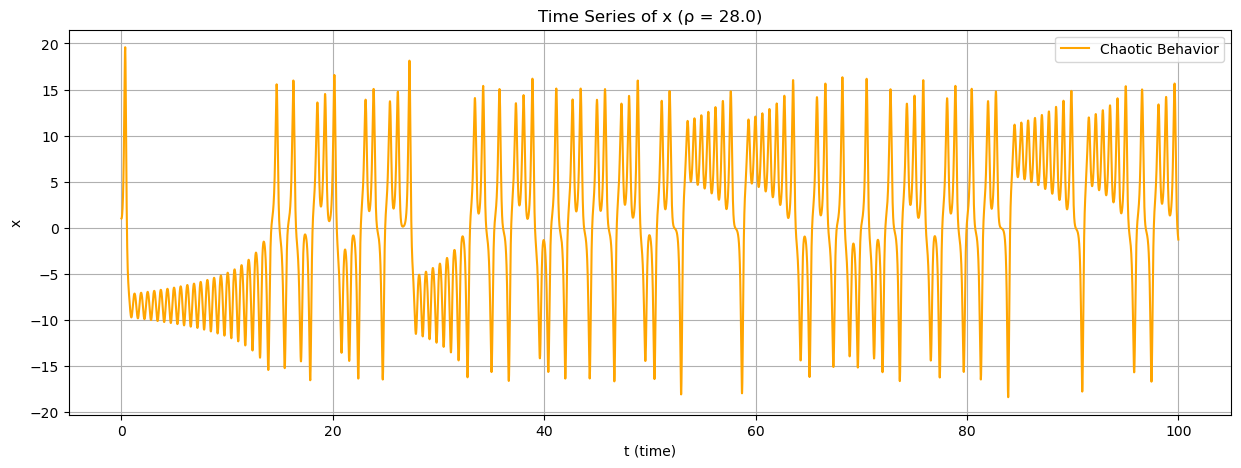

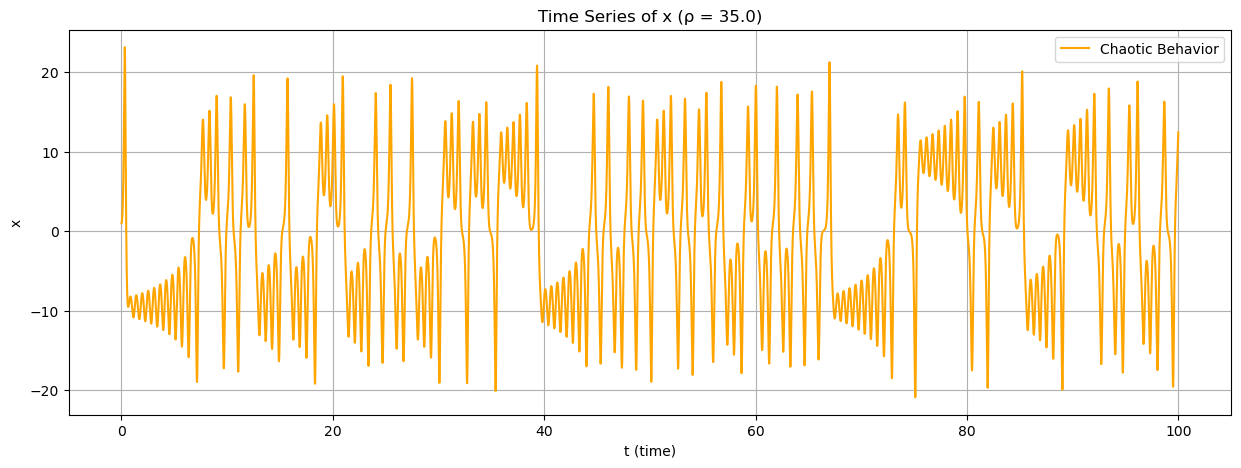

In [69]:
# Parameters for periodic and chaotic behavior
sigma = 10.0
beta = 8.0 / 3.0
rho_periodic = [13., 14., 15.]  # Known to produce periodic behavior (from bifurcation diagram)
rho_chaotic = [25., 28., 35.]  # Known to produce chaotic behavior (from bifurcation diagram)
t_span = (0, 100)  # Integration time span
dt = 0.01  # Time step

# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Time evaluation points
t_eval = np.arange(t_span[0], t_span[1], dt)

# Define range limits for plotting
start = 0
end = len(t_eval)  # Adjust based on the desired number of points to display

# Plot time series of x for periodic behavior

for rho in rho_periodic:
    global sigma
    global beta
    sol_periodic = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval) #solve system of ODEs for given parameters/initial conditions
    x_series_periodic = sol_periodic.y[0] #extract x values from solution
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.plot(t_eval[start:end], x_series_periodic[start:end], label='Periodic Behavior')
    plt.xlabel('t (time)')
    plt.ylabel('x')
    plt.title(f'Time Series of x (ρ = {rho})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot time series of x for chaotic behavior

for rho in rho_chaotic:
    global sigma
    global beta
    sol_chaotic = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval) #solve system of ODEs for given parameters/initial conditions
    x_series_chaotic = sol_chaotic.y[0] #extract x values from solution
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.plot(t_eval[start:end], x_series_chaotic[start:end], label='Chaotic Behavior', color='orange')
    plt.xlabel('t (time)')
    plt.ylabel('x')
    plt.title(f'Time Series of x (ρ = {rho})')
    plt.legend()
    plt.grid(True)
    plt.show()


# Analyzing the Butterfly Effect

The “Butterfly Effect” describes the phenomenon that occurs in chaotic systems where small perturbations in the initial conditions can result in a wildly different result.

We can explore this effect through mapping the time series for slightly different initial conditions and comparing them through their difference to see just how differently they evolve.

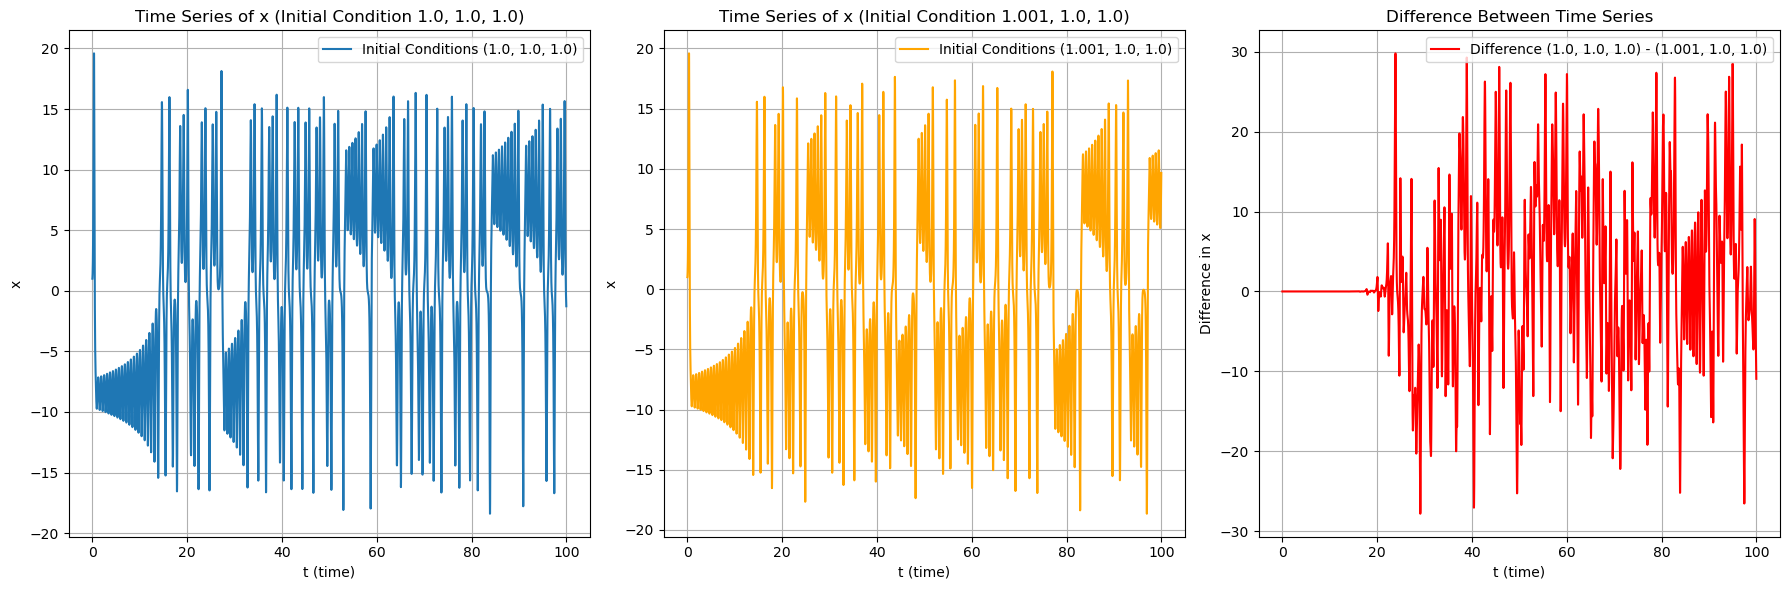

In [3]:
# Parameters for the Lorenz system
sigma = 10.0
rho = 28.0  # Known to produce chaotic behavior
beta = 8.0 / 3.0
t_span = (0, 100)  # Integration time span
dt = 0.01  # Time step
num_iterations = int((t_span[1] - t_span[0]) / dt)  # Number of iterations

# Initial conditions, only slightly different from one another to show comparison
initial_conditions = [
    [1.0, 1.0, 1.0],
    [1.001, 1.0, 1.0]
]

# Time evaluation points
t_eval = np.arange(t_span[0], t_span[1], dt)

# Integrate the Lorenz system for the each initial condition

sol1 = solve_ivp(lorenz, t_span, initial_conditions[0], args=(sigma, rho, beta), t_eval=t_eval) #solve system of ODEs for first set of initial conditions
x_series1 = sol1.y[0] # extract x values

sol2 = solve_ivp(lorenz, t_span, initial_conditions[1], args=(sigma, rho, beta), t_eval=t_eval) #solve system of ODEs for second set of initial conditions
x_series2 = sol2.y[0] # extract x values

# Calculate the difference between the two time series
difference_series = x_series1 - x_series2

# Define range limits for plotting
start = 0
end = len(t_eval)  # Adjust based on the desired number of points to display

# Plotting time series

plt.figure(figsize=(18, 6))

#first set of intial conditions
plt.subplot(1, 3, 1)
plt.plot(t_eval[start:end], x_series1[start:end], label='Initial Conditions (1.0, 1.0, 1.0)')
plt.xlabel('t (time)')
plt.ylabel('x')
plt.title('Time Series of x (Initial Condition 1.0, 1.0, 1.0)')
plt.legend()
plt.grid(True)

#second set of intial conditions
plt.subplot(1, 3, 2)
plt.plot(t_eval[start:end], x_series2[start:end], label='Initial Conditions (1.001, 1.0, 1.0)', color='orange')
plt.xlabel('t (time)')
plt.ylabel('x')
plt.title('Time Series of x (Initial Condition 1.001, 1.0, 1.0)')
plt.legend()
plt.grid(True)

#difference between time series
plt.subplot(1, 3, 3)
plt.plot(t_eval[start:end], difference_series[start:end], label='Difference (1.0, 1.0, 1.0) - (1.001, 1.0, 1.0)', color='red')
plt.xlabel('t (time)')
plt.ylabel('Difference in x')
plt.title('Difference Between Time Series')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
